In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd

path="/content/drive/My Drive/Academic/UCSC/4th Year/Final Year Research/Dataset/Oneplus 5T/Level 02/*"

IMG_WIDTH=300
IMG_HEIGHT=400

def create_dataset(path):
  i=0
  img_data_array=[]
  class_name=[]

  for file in glob.glob(path):
    # print(i)
    image=cv2.imread(file)
    rgbImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsvImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    low_green = np.array([30, 50, 76])
    high_green = np.array([80, 255, 255])
    mask = cv2.inRange(hsvImage, low_green, high_green)
    maskInvert = np.invert(mask)

    b,g,r = cv2.split(rgbImage)

    b = np.bitwise_or(maskInvert, b)
    g = np.bitwise_or(maskInvert, g)
    r = np.bitwise_or(maskInvert, r)

    result = cv2.merge([b,g,r])

    image1 = cv2.resize(result, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    
    # plt.imshow(image1)
    # plt.show()

    img_data_array.append([image1])
    class_name.append(2)
    i+=1
    if(i==10):break
  return img_data_array, class_name

# extract the image array and class name
img_data, class_name =create_dataset(path)
print(img_data)


[[array([[[110, 130,  75],
        [127, 155,  87],
        [125, 153,  75],
        ...,
        [227, 231, 221],
        [117, 161,  45],
        [114, 158,  43]],

       [[125, 137,  77],
        [177, 186, 155],
        [149, 175, 115],
        ...,
        [172, 189, 143],
        [122, 169,  43],
        [117, 158,  46]],

       [[182, 192, 156],
        [179, 187, 155],
        [148, 163, 119],
        ...,
        [151, 177, 106],
        [122, 168,  44],
        [121, 161,  50]],

       ...,

       [[123, 149,  70],
        [118, 134,  83],
        [ 99, 131,  47],
        ...,
        [253, 253, 253],
        [255, 255, 255],
        [253, 253, 252]],

       [[ 65, 100,  15],
        [ 98, 131,  35],
        [107, 151,  22],
        ...,
        [145, 167, 106],
        [233, 236, 227],
        [255, 255, 255]],

       [[ 88, 134,  20],
        [108, 154,  24],
        [ 96, 142,  20],
        ...,
        [222, 228, 211],
        [125, 154,  73],
        [202, 211, 188

In [50]:
# print(img_data)
# print(class_name)
# plt.imshow(img_data[0])
# plt.show()
#converting the list to numpy array and saving it to a file using #numpy.save
#np.save(os.path.join(path,'features'),np.array(training_data))
#with open('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_in_csv/imageArray.npy', 'w') as f:
np.save('drive/My Drive/Academic/UCSC/4th Year/Final Year Research/Dataset/Oneplus 5T/data_in_csv/imageArray.npy',np.array(img_data))
np.save('drive/My Drive/Academic/UCSC/4th Year/Final Year Research/Dataset/Oneplus 5T/data_in_csv/labeldata.npy',np.array(class_name))

In [51]:
print(class_name)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


TypeError: ignored

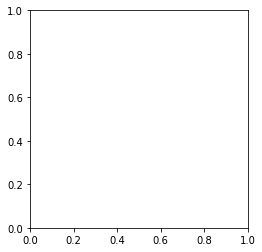

In [52]:
#loading the saved file once again
saved = np.load("drive/My Drive/Academic/UCSC/4th Year/Final Year Research/Dataset/Oneplus 5T/data_in_csv/imageArray.npy")
plt.imshow(saved[0])
plt.show()